In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from simple_pairs_trading import generate_data, adfuller_ts_test
# import seaborn as sns; sns.set(style="whitegrid")

In [49]:
# Set the parameters and the number of datapoints
params = (0, 1)
T = 100

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_data(params)

T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    # Now the parameters are dependent on time
    # Specifically, the mean of the series changes over time
    params = (t * 0.1, 1)
    B[t] = generate_data(params)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  del sys.path[0]


In [50]:
print(adfuller_ts_test(A))
print(adfuller_ts_test(B))

p-value = 7.7981693413156e-19 The series A is likely stationary.
None
p-value = 0.9234684589193577 The series B is likely non-stationary.
None


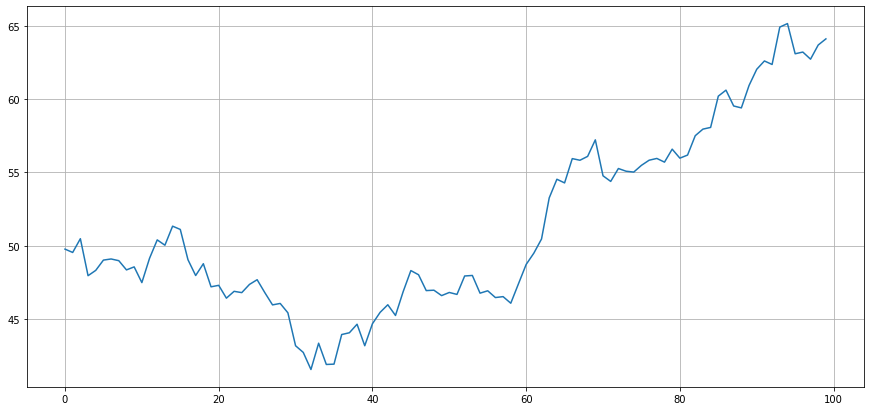

In [51]:
# Generate daily returns

Xreturns = np.random.normal(0, 1, 100)

# sum up and shift the prices up

X = pd.Series(np.cumsum(
    Xreturns), name='X') + 50
X.plot(figsize=(15,7))
plt.grid(True)
plt.show()

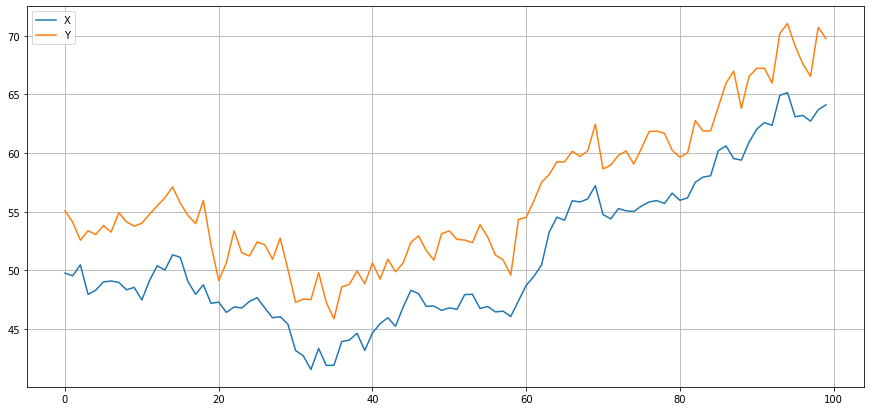

In [52]:
noise = np.random.normal(0, 1, 100)
Y = X + 5 + noise
Y.name = 'Y'

pd.concat([X, Y], axis=1).plot(figsize=(15, 7))

plt.grid(True)
plt.show()

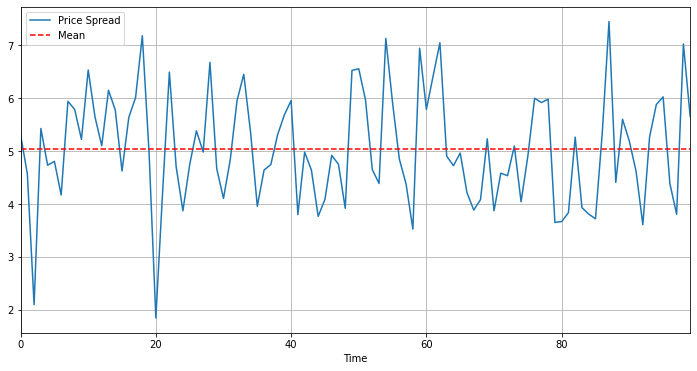

In [53]:
YX_pair_ts_diff = Y - X
plt.figure(figsize=(12,6))
(YX_pair_ts_diff).plot() # Plot the spread
plt.axhline(YX_pair_ts_diff.mean(), color='red', linestyle='--') # Add the mean
plt.xlabel('Time')
plt.xlim(0,99)
plt.legend(['Price Spread', 'Mean'])
plt.grid(True)
plt.show()

In [54]:
print(f"Diff between the 2 cointegrated series:\n{YX_pair_ts_diff}")

Diff between the 2 cointegrated series:
0     5.309044
1     4.571910
2     2.094970
3     5.428400
4     4.733345
        ...   
95    6.026037
96    4.386222
97    3.805613
98    7.027420
99    5.655818
Length: 100, dtype: float64


In [58]:
print(YX_pair_ts_diff.describe())
# print(type(YX_pair_ts_diff))

count    100.000000
mean       5.043889
std        1.058014
min        1.843949
25%        4.338070
50%        4.941975
75%        5.812886
max        7.452965
dtype: float64


In [ ]:
# ts1 = 
# ts2 = 
score, pvalue, _ = coint(S1, S2)
# If the p-value is less than 0.05, this means that ts1 and ts2 are indeed cointegrated pairs.